# **WILD Self-Supervised Pipeline**
### Use the self-supervised DINO model + WILD self-supervised pipeline to label your data




## Step 1: Upload your images to Google Drive

- Connect this notebook to Google Drive

- Navigate to *wild/data/images*
- Upload train, validation and test sets into respective folders

- Navigate to *wild/data/labels*
- If any ground truth labels are available for comparison, upload them to the the train, validation and test folders respectively




In [1]:
cd drive/MyDrive/wild

/content/drive/MyDrive/wild


#### Generate list of image names for training set

In [ ]:
import os

directory = "./data/images/train/"
filenames =  os.listdir(directory)

if os.path.exists("./data/train_files.txt"):
      os.remove("./data/train_files.txt")

f = open("./data/train_files.txt", "a+")
f.write("\n".join(filenames))
f.write("\n")
f.close()

#### Generate list of image names for validation set

In [ ]:
import os

directory = "./data/images/val/"
filenames =  os.listdir(directory)

if os.path.exists("./data/val_files.txt"):
      os.remove("./data/val_files.txt")

f = open("./data/val_files.txt", "a")
f.write("\n".join(filenames))
f.write("\n")
f.close()

## Step 2: Run your input images through DINO to get attention maps

#### Run training and validation images through DINO

In [ ]:
cd ./dino

/content/drive/MyDrive/wild/dino


#### Parameter Guide

- folder_path: path_to_training_images
- image_list: path_to_image_list
- output_dir: path_to_destination_folder
- batch_start_index: *default = 0* i.e. start from beginning of images
- batch_size: total number of images
- sample_interval: *default = 1* i.e. process every image in the set
- image_size: width height, *default = 640*

#### Run training images through DINO

In [ ]:
!python custom_visualize_attention.py \
  --folder_path ../data/images/train \
  --image_list ../data/train_files.txt \
  --output_dir ../data/ss_labels/masks/train \
  --batch_start_index 0 \
  --batch_size 3 \
  --sample_interval 1 \
  --image_size 640 640

Please use the `--pretrained_weights` argument to indicate the path of the checkpoint to evaluate.
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_300ep_pretrain/dino_deitsmall8_300ep_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_300ep_pretrain.pth
100% 82.7M/82.7M [00:01<00:00, 57.5MB/s]
['t1-frame_048295.PNG\n', 't7-frame_020720.PNG\n', 't1-frame_076930.PNG\n']
../data/images/train/t1-frame_048295.PNG
../data/images/train/t7-frame_020720.PNG
../data/images/train/t1-frame_076930.PNG


#### Run validation images through DINO

In [ ]:
!python custom_visualize_attention.py \
  --folder_path ../data/images/val \
  --image_list ../data/val_files.txt \
  --output_dir  ../data/ss_labels/masks/val \
  --batch_start_index 0 \
  --batch_size 3 \
  --sample_interval 1 \
  --image_size 640 640

Please use the `--pretrained_weights` argument to indicate the path of the checkpoint to evaluate.
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_300ep_pretrain/dino_deitsmall8_300ep_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_300ep_pretrain.pth
100% 82.7M/82.7M [00:00<00:00, 121MB/s]
['t1-frame_092915.png\n', 't1-frame_020640.png\n', 'videobh_2_005204.png\n']
../data/images/val/t1-frame_092915.png
../data/images/val/t1-frame_020640.png
../data/images/val/videobh_2_005204.png


## Step 3: Convert attention maps to pseudo-labels

#### Move out of DINO folder

In [ ]:
cd ../

/content/drive/MyDrive/wild


#### Create pseudo-labels for training set

- Select input type *attention*

- Set file paths

- Set batching parameters

- Set threshold for binary thresholding

*Lower thresholds recall more objects but increase noise, higher thresholds decrease noise but may miss relevant objects.*



In [ ]:
!python autolabel.py \
    --input_type 'attention' \
    --img_path "./data/images/train" \
    --msk_path "./data/ss_labels/masks/train/" \
    --dest_path "./data/ss_labels/raw_labels/train/" \
    --image_list "./data/train_files.txt" \
    --batch_start_index 0 \
    --batch_size 3 \
    --sample_interval 1 \
    --threshold 80

Generating pseudo-labels based on attention maps...


#### Create pseudo-labels for validation set

In [ ]:
!python autolabel.py \
    --input_type 'attention' \
    --img_path "./data/images/val" \
    --msk_path "./data/ss_labels/masks/val/" \
    --dest_path "./data/ss_labels/raw_labels/val/" \
    --image_list "./data/val_files.txt" \
    --batch_start_index 0 \
    --batch_size 3 \
    --sample_interval 1 \
    --threshold 80

Generating pseudo-labels based on attention maps...


## Step 4: Visualise bounding boxes to check generated pseudo-labels

- Bounding boxes can be visualised on the original images to check their validity
- Bounding boxes can be plotted for the generated pseudo-labels alone or together with ground truth labels if available

In [2]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np

def show(imgs):
    """
    Visualise images.

    Arguments:
    - Images to be plotted
    """
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#### Plot bounding boxes for pseudo-labels only

- Visualise generated labels on original input image

In [ ]:
!python visualise_labels.py \
    --filename "t7-frame_020720.png" \
    --img_path "./data/images/train/" \
    --gt_label_path "" \
    --pseudo_label_path "./data/ss_labels/raw_labels/train/" \
    --output_dir "./data/ss_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for specified image...
Binary Mask IOU between ground truth and pseudolabel: 0.0


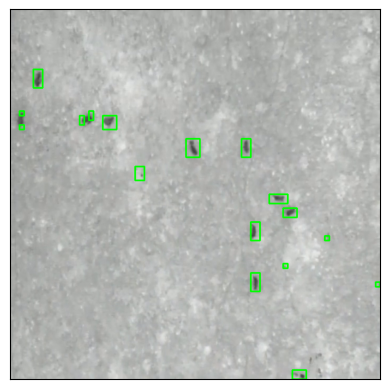

In [ ]:
im = read_image("./data/ss_labels/bbs/train/t7-frame_020720_bbs.png")
show(im)

#### Plot bounding boxes for pseudo-labels and ground truth

- Compare generated labels (green) to ground truth labels (blue)

In [ ]:
!python visualise_labels.py \
    --filename "t7-frame_020720.png" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/ss_labels/raw_labels/train/" \
    --output_dir "./data/ss_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for specified image...
Binary Mask IOU between ground truth and pseudolabel: 0.32548585874545743


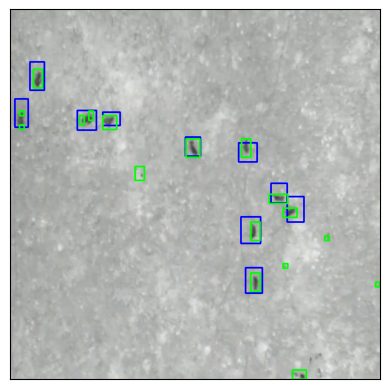

In [ ]:
im = read_image("./data/ss_labels/bbs/train/t7-frame_020720_bbs.png")
show(im)

#### Plot bounding boxes for multiple images

#### Training set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/ss_labels/raw_labels/train/" \
    --output_dir "./data/ss_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for image set...


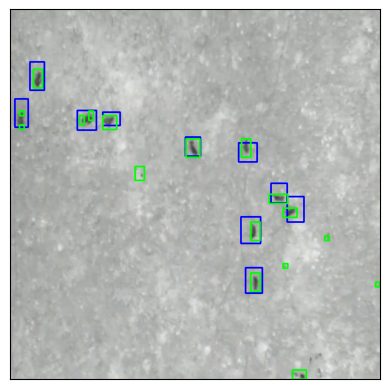

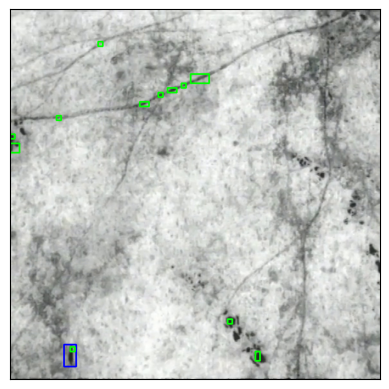

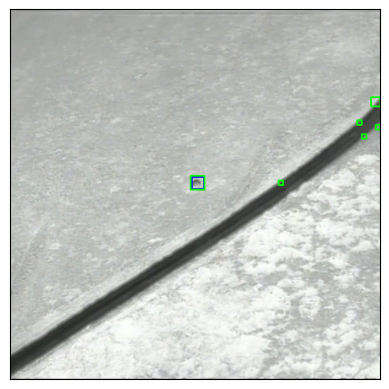

In [ ]:
im1 = read_image("./data/ss_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/ss_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/ss_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

#### Validation set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/ss_labels/raw_labels/val/" \
    --output_dir "./data/ss_labels/bbs/val/" \
    --image_size 640

Visualising bounding boxes for image set...


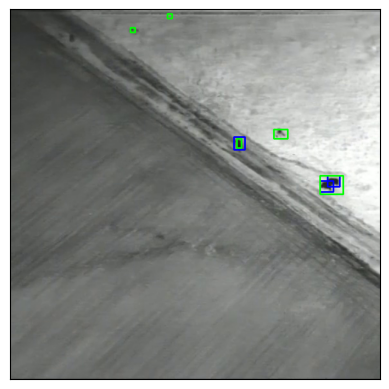

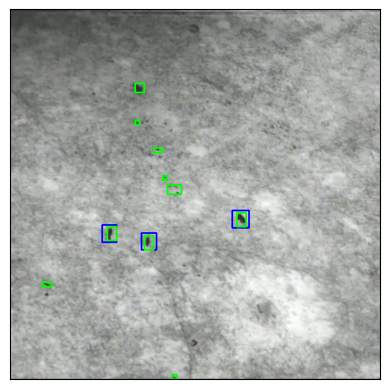

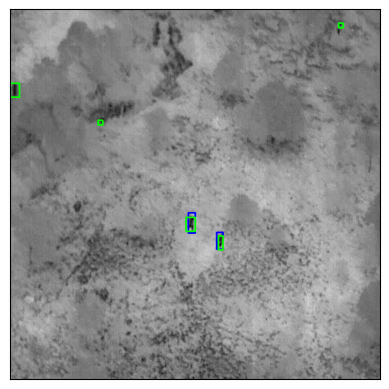

In [ ]:
im1 = read_image("./data/ss_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/ss_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/ss_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

## Step 5: Post-Processing

- Parameters can be tweaked to suit your dataset best

### a) Filtering

In [6]:
!python postprocessing.py \
    --task "filt" \
    --image_list "./data/train_files.txt" \
    --source_path "./data/ss_labels/raw_labels/train/" \
    --dest_path "./data/ss_labels/processed_labels/train/" \
    --param_value 0.015

Filtering small bounding boxes/noise...
Chosen filtering threshold: 0.015


In [7]:
!python postprocessing.py \
    --task "filt" \
    --image_list "./data/val_files.txt" \
    --source_path "./data/ss_labels/raw_labels/val/" \
    --dest_path "./data/ss_labels/processed_labels/val/" \
    --param_value 0.015

Filtering small bounding boxes/noise...
Chosen filtering threshold: 0.015


### Visualise processed labels after filtering

#### Training set

In [8]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/ss_labels/processed_labels/train/" \
    --output_dir "./data/ss_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for image set...


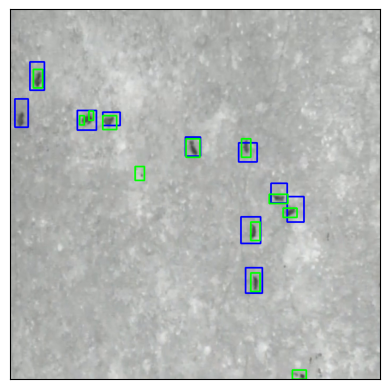

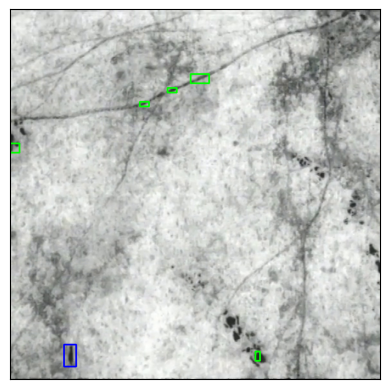

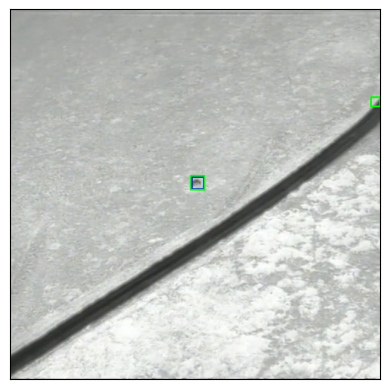

In [9]:
im1 = read_image("./data/ss_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/ss_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/ss_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

#### Validation set

In [10]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/ss_labels/processed_labels/val/" \
    --output_dir "./data/ss_labels/bbs/val/" \
    --image_size 640

Visualising bounding boxes for image set...


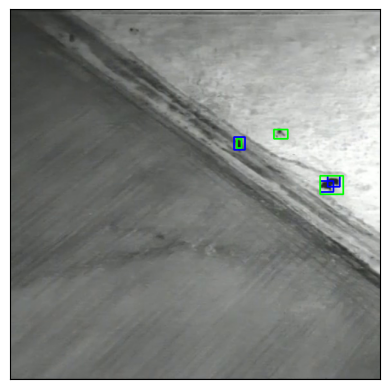

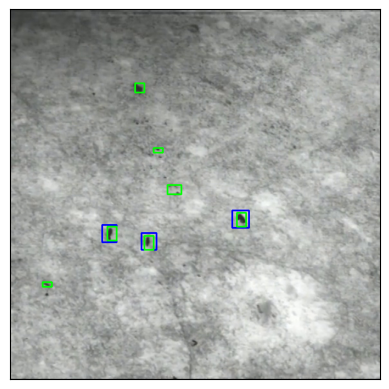

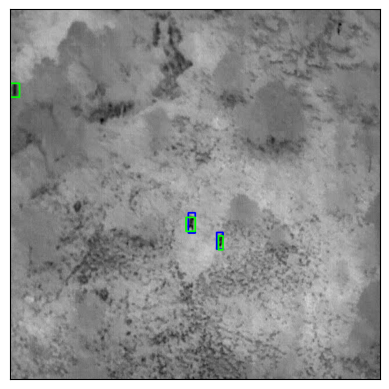

In [11]:
im1 = read_image("./data/ss_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/ss_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/ss_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

### b) Padding

In [12]:
!python postprocessing.py \
    --task "pad" \
    --image_list "./data/train_files.txt" \
    --source_path "./data/ss_labels/processed_labels/train/" \
    --dest_path "./data/ss_labels/processed_labels/train/" \
    --param_value 0.01

Padding bounding boxes for better representation...
Chosen padding value: 0.01
Pad bounding boxes for 3 labels.


In [13]:
!python postprocessing.py \
    --task "pad" \
    --image_list "./data/val_files.txt" \
    --source_path "./data/ss_labels/processed_labels/val/" \
    --dest_path "./data/ss_labels/processed_labels/val/" \
    --param_value 0.01

Padding bounding boxes for better representation...
Chosen padding value: 0.01
Pad bounding boxes for 3 labels.


#### Visualise bounding boxes for a set of images

#### Training set

In [14]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/ss_labels/processed_labels/train/" \
    --output_dir "./data/ss_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for image set...


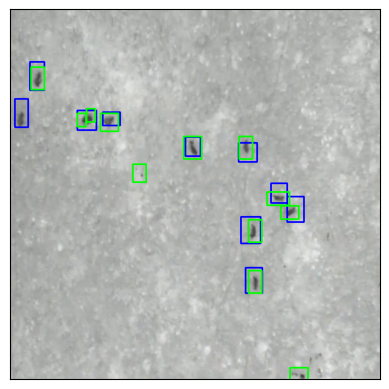

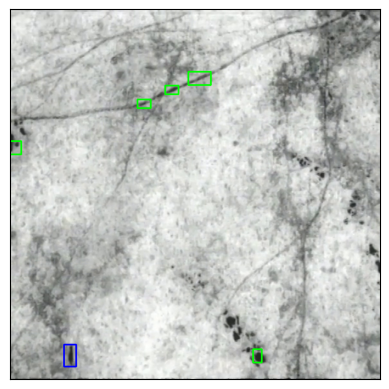

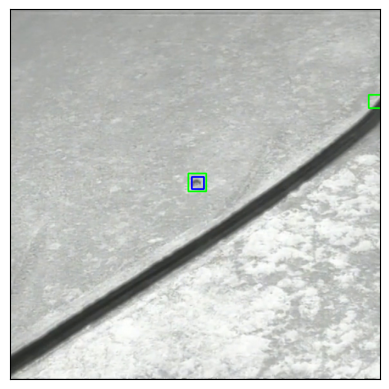

In [15]:
im1 = read_image("./data/ss_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/ss_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/ss_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

#### Validation set

In [16]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/ss_labels/processed_labels/val/" \
    --output_dir "./data/ss_labels/bbs/val/" \
    --image_size 640

Visualising bounding boxes for image set...


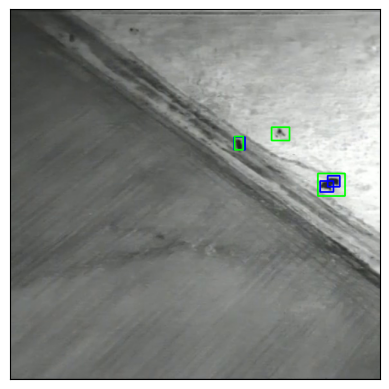

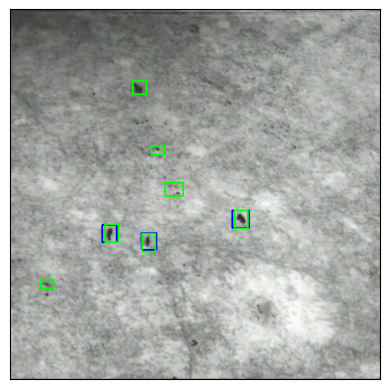

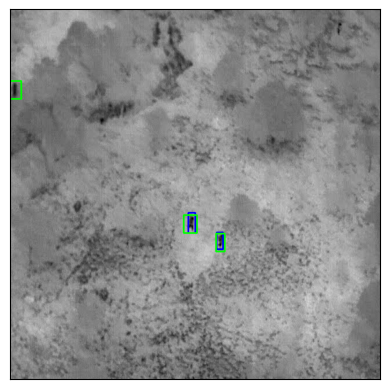

In [17]:
im1 = read_image("./data/ss_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/ss_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/ss_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

### Optional: Try different hyperparameters to improve performance

- Tweak any hyperparameter stated above to better suit your dataset

## Step 6: Train your detection model

- While the purpose of this notebook is provide an accessible means of labelling aerial data, the labelled data may commonly be used for detection tasks such as training a YOLOv5 object detection model

- Training and inference using the YOLOv5 detection model can be performed as documented: https://github.com/ultralytics/yolov5

- Training and validation of the YOLOv5 model on the full SPOTS dataset has not been included below due to data privacy, however for completeness, the below steps outline the detection training and inference process and hyperparameters used in the study.

#### Clone YOLOv5

In [ ]:
# Run once to clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5

#### Install requirements

In [ ]:
cd ./yolov5

In [ ]:
!pip install -r requirements.txt  # install

#### Set up data

- Create a data.yaml file for training

Example:

```
# Train/val/test sets
path: ../data/  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/val # val images (relative to 'path')
test: images/test # test images

# Classes
nc: 1 # number of classes
names: ['target']  # class names
```

#### Training

In [ ]:
!python train.py --img 640 --batch 32 --epochs 50 --data data.yaml --weights  yolov5s.pt

#### Inference

#### Save output predictions to text files

In [ ]:
!python val.py --weights runs/train/exp1/weights/best.pt --data data.yaml --img 640 --task test --save-txt --save-conf